<img>
<html>
  <head>
  </head>

  <body>
    <img src="image/123.jpg">
  </body>
</html>

<a id="library"></a>
<div style="background-color:#3C0753; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;"></span> Intro of the Data
    </h2>
</div>


# 🚀 Resume Parsing Dataset by Neuralframe AI  

## 📌 About the Dataset  
This **comprehensive dataset**, curated and processed by **Neuralframe AI**, is designed for **resume parsing, candidate profiling, and job matching applications**. It contains structured information such as:  

✅ **Career Objectives**  
✅ **Skills & Expertise**  
✅ **Education & Certifications**  
✅ **Work Experience**  
✅ **Projects & Achievements**  

📢 The data has been sourced from **open platforms** and **Neuralframe AI's proprietary sources**, with **explicit consent** from contributors.  

---

## 🏆 Featured in Datathon @ Bitfest 2025  
This dataset was **first utilized** in the **Datathon Competition** at **Bitfest 2025**, enabling participants to develop and refine:  

🔹 **Resume Parsing Algorithms**  
🔹 **Candidate Evaluation Models**  
🔹 **Job Matching Systems**  

---

## 🎯 Get Started!  
Feel free to **explore, analyze, and innovate** with this dataset. If you find it **helpful or insightful**, consider **giving it an upvote**! 👍  

**Thank You! 🚀**  


- **About the author:** Sajjad Ali Shah
- **LinkedIn:** [LinkedIn Profile](https://www.linkedin.com/in/sajjad-ali-shah47/)
- **Dataset link:** [Resume Data](https://www.kaggle.com/datasets/saugataroyarghya/resume-dataset/data)

---

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Sajjad
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sajjad
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sajjad
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
 #Fill missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Text preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

NameError: name 'df' is not defined

In [3]:
# Apply preprocessing to relevant text columns
text_columns = ['skills', 'responsibilities', 'related_skils_in_job', 'responsibilities.1', 'skills_required']
for col in text_columns:
    if col in df.columns:
        print(f"Preprocessing {col} column...")
        df[f'{col}_processed'] = df[col].apply(preprocess_text)

# Combine preprocessed text features
df['combined_features'] = ''
for col in [f'{c}_processed' for c in text_columns if f'{c}_processed' in df.columns]:
    df['combined_features'] += df[col] + ' '
df['combined_features'] = df['combined_features'].str.strip()

Preprocessing skills column...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Sajjad Khan/nltk_data'
    - 'd:\\Anaconda Installation\\envs\\Rec_sys_env\\nltk_data'
    - 'd:\\Anaconda Installation\\envs\\Rec_sys_env\\share\\nltk_data'
    - 'd:\\Anaconda Installation\\envs\\Rec_sys_env\\lib\\nltk_data'
    - 'C:\\Users\\Sajjad Khan\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [4]:
# Check category distribution
print("\nResume categories distribution:")
category_counts = df['Category'].value_counts()
print(category_counts)



Resume categories distribution:


KeyError: 'category'

In [5]:
# Shape of the data
df.shape

(9544, 35)

In [6]:
# check for missing values
df.isnull().sum()

address                                8760
career_objective                       4804
skills                                   56
educational_institution_name             84
degree_names                             84
passing_years                            84
educational_results                      84
result_types                             84
major_field_of_studies                   84
professional_company_names               84
company_urls                             84
start_dates                              84
end_dates                                84
related_skils_in_job                     84
positions                                84
locations                                84
responsibilities                          0
extra_curricular_activity_types        6118
extra_curricular_organization_names    6118
extra_curricular_organization_links    6118
role_positions                         6118
languages                              8844
proficiency_levels              

In [7]:
df.isnull()["skills"].value_counts()

skills
False    9488
True       56
Name: count, dtype: int64

In [8]:
# Check missing values in percentage
df.isnull().sum() /len(df) * 100

address                                91.785415
career_objective                       50.335289
skills                                  0.586756
educational_institution_name            0.880134
degree_names                            0.880134
passing_years                           0.880134
educational_results                     0.880134
result_types                            0.880134
major_field_of_studies                  0.880134
professional_company_names              0.880134
company_urls                            0.880134
start_dates                             0.880134
end_dates                               0.880134
related_skils_in_job                    0.880134
positions                               0.880134
locations                               0.880134
responsibilities                        0.000000
extra_curricular_activity_types        64.103101
extra_curricular_organization_names    64.103101
extra_curricular_organization_links    64.103101
role_positions      

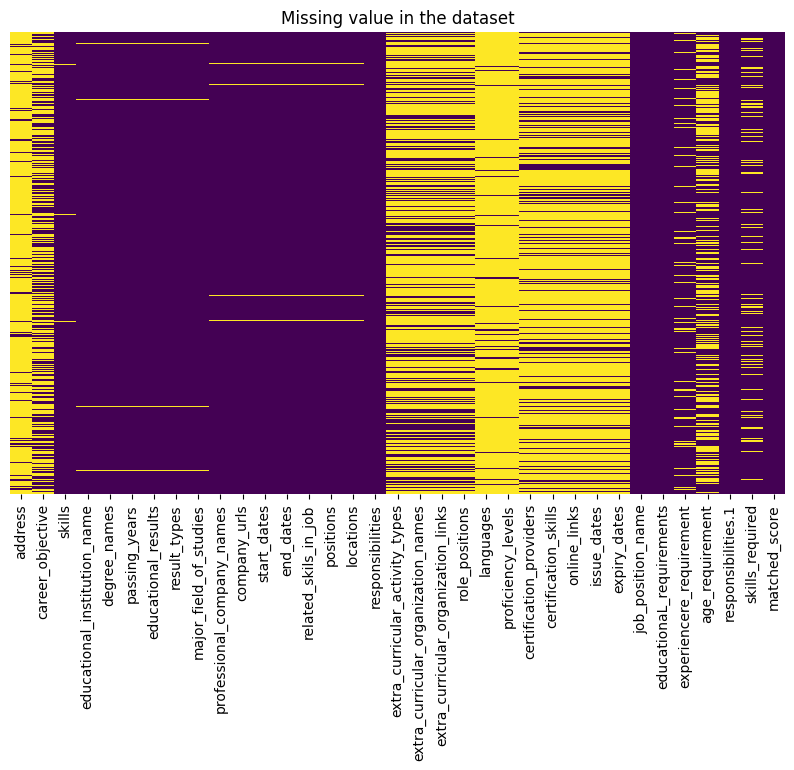

In [9]:
# Visualize the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')
plt.show()

In [10]:
# check the duplicate of the data
def check_duplicate(data):
    duplicate=data.duplicated().sum()
    if duplicate==0:
        return "No duplicate values"
    else:
        return "Duplicate values"
check_duplicate(df)

'No duplicate values'

In [11]:
# Removing the 90% missing values of each column
df.dropna(thresh=0.65*len(df),axis=1,inplace=True)

In [12]:
df.isnull().sum()

skills                            56
educational_institution_name      84
degree_names                      84
passing_years                     84
educational_results               84
result_types                      84
major_field_of_studies            84
professional_company_names        84
company_urls                      84
start_dates                       84
end_dates                         84
related_skils_in_job              84
positions                         84
locations                         84
responsibilities                   0
﻿job_position_name                 0
educationaL_requirements           0
experiencere_requirement        1364
responsibilities.1                 0
skills_required                 1701
matched_score                      0
dtype: int64

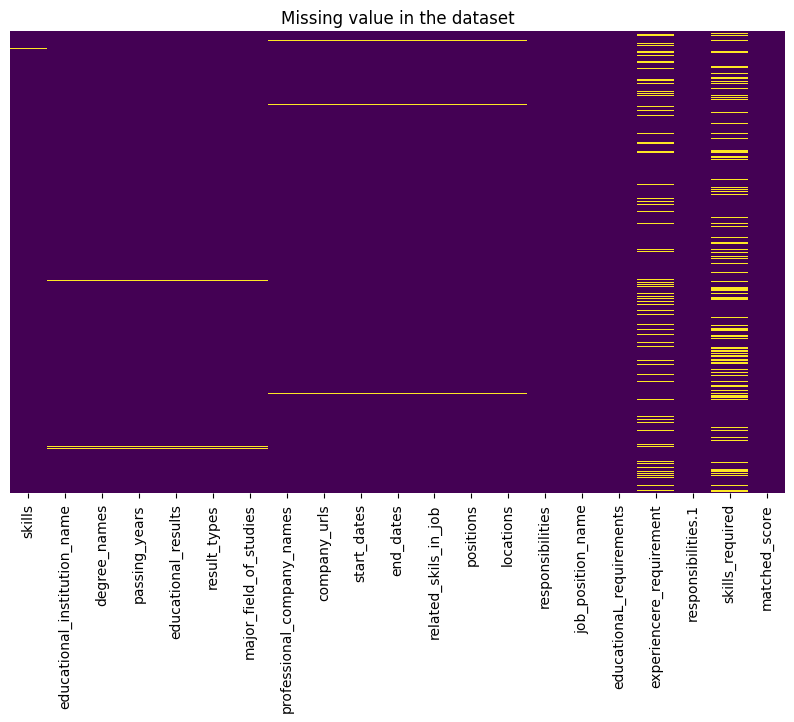

In [13]:
# lets visualize the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')
plt.show()

In [14]:
# Filling tjhe missing values by scikit learn imputer of all the missig values
from sklearn.impute import SimpleImputer


In [15]:
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [16]:
# Lets check again the missing values
df.isnull().sum().sum()

np.int64(0)

In [30]:
df["end_dates"].value_counts()

end_dates
['Till Date']                                                                                          784
['Ongoing']                                                                                            588
['till date']                                                                                          336
['Oct 2020']                                                                                           280
['Dec 2020']                                                                                           168
                                                                                                      ... 
['10/2019', '11/2013', '01/2003', '01/2002', '01/2000', '01/1995']                                      20
['Current', 'Current', 'Current', '06/2014', '08/2011', '08/2009', '11/2007', '02/2004', '03/1999']     12
['Jul 2016', 'Jul 1996', 'Nov 1995', 'Oct 1992']                                                        10
['Current', '05/2005', '12/

In [19]:
df.columns

Index(['skills', 'educational_institution_name', 'degree_names',
       'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'responsibilities.1', 'skills_required', 'matched_score'],
      dtype='object')

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



KeyboardInterrupt



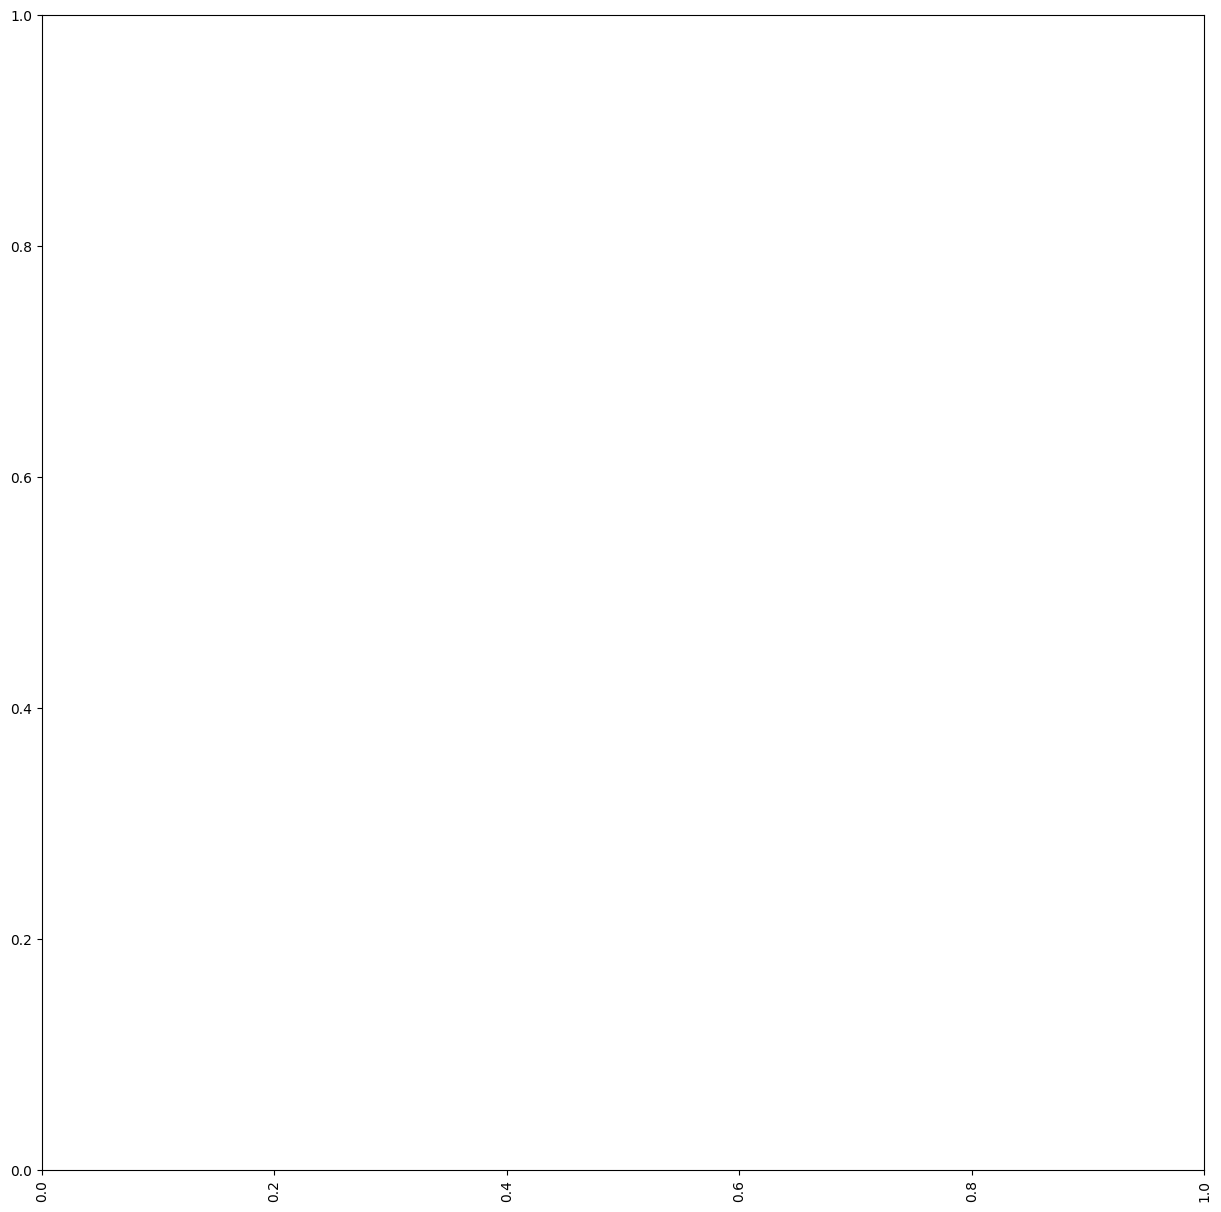

In [18]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)